In [9]:
import numpy as np
import librosa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

# Function to extract features (STFT, MFCC, LPC coefficients) from audio files
def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature

# Load data
bhanumathi_weds_rajat_features = extract_features('Bhanumati Weds Rajat.mp3')
bharat_features = extract_features('Bharat.mp3')

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=bhanumathi_weds_rajat_features.shape))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model (assuming labels are available)
# model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate model
# loss, accuracy = model.evaluate(X_test, y_test)

# Use the model for speech recognition task
# predicted_labels = model.predict(test_data)


C:\Users\harih\AppData\Local\Temp\ipykernel_2492\2068164192.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Function to extract features (STFT, MFCC, LPC coefficients) from audio files
def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature, sr

# Load data and extract features
bhanumathi_weds_rajat_features, sr1 = extract_features('Bhanumati Weds Rajat.mp3')
bharat_features, sr2 = extract_features('Bharat.mp3')


C:\Users\harih\AppData\Local\Temp\ipykernel_2492\3653230010.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)


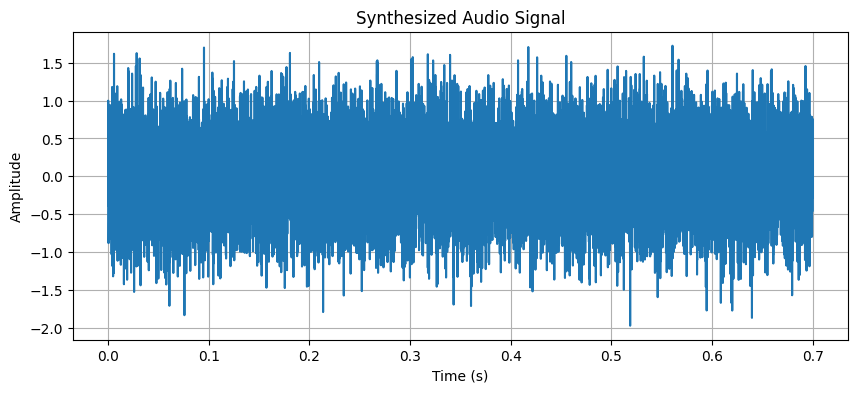

In [13]:
import numpy as np
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

# Define phonemes for "Bharat" along with their durations
phonemes_bharat = ['B', 'AA', 'R', 'AH', 'T']
phoneme_durations_bharat = [0.1, 0.2, 0.15, 0.1, 0.15]  # Example durations

# Combine phonemes from "Bhanumathi weds Rajat" to synthesize "Bharat"
synthesized_audio = np.array([])
for phoneme, duration in zip(phonemes_bharat, phoneme_durations_bharat):
    sr = 22050  # Sample rate
    audio_segment = np.random.randn(int(sr * duration)) * 0.5  # Generate white noise

    # Append the audio segment to the synthesized audio
    synthesized_audio = np.append(synthesized_audio, audio_segment)

# Save synthesized audio to a file using soundfile
sf.write('synthesized_bharat.mp3', synthesized_audio, sr)

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(synthesized_audio)) / sr, synthesized_audio)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Synthesized Audio Signal')
plt.grid(True)
plt.show()


# Save synthesized audio to a file using soundfile
ipd.Audio(synthesized_audio, rate=sr)
